In [1]:
from google.colab import files

In [2]:
files.upload()

Saving country_model_dataset.csv to country_model_dataset.csv


{'country_model_dataset.csv': b'Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit\r\nAfganist\xc3\xa1n,Antminer S17+ 70TH/s ,102.2,2800,70,139.5696043,0.015218\r\nAfganist\xc3\xa1n,Antminer S17e-60TH/s ,98.55,2700,60,119.63108940000001,0.013044\r\nAfganist\xc3\xa1n,Antminer S19 - 95TH/s ,118.625,3250,95,189.41589155000003,0.020653\r\nAfganist\xc3\xa1n,Antminer S19 Pro 110TH/s,118.625,3250,110,219.3236639,0.023914\r\nAfganist\xc3\xa1n,Antminer S9 SE-16TH/s ,46.72,1280,16,31.901623840000003,0.0034784\r\nAfganist\xc3\xa1n,Antminer S9k-13.5TH/s ,41.902,1148,14,27.91392086,0.0030436\r\nAfganist\xc3\xa1n,Antminer T17+ 58TH/s ,105.85,2900,58,115.64338642,0.0126092\r\nAfganist\xc3\xa1n,Antminer T19 - 84TH/s ,114.975,3150,84,167.48352516,0.0182616\r\nAfganist\xc3\xa1n,INNOSILICON T2T-29T ,80.30000000000003,2200,29,57.82169321,0.0063046\r\nAlbania,Antminer S17+ 70TH/s ,204.4,2800,70,139.5696043,0.015218\r\nAlbania,Antminer S17e-60TH/s ,197.1,2700,60,119.63108940000001,0.013044\

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [4]:
df=pd.read_csv('country_model_dataset.csv')

In [5]:
df

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit
0,Afganistán,Antminer S17+ 70TH/s,102.2000,2800,70,139.569604,0.015218
1,Afganistán,Antminer S17e-60TH/s,98.5500,2700,60,119.631089,0.013044
2,Afganistán,Antminer S19 - 95TH/s,118.6250,3250,95,189.415892,0.020653
3,Afganistán,Antminer S19 Pro 110TH/s,118.6250,3250,110,219.323664,0.023914
4,Afganistán,Antminer S9 SE-16TH/s,46.7200,1280,16,31.901624,0.003478
...,...,...,...,...,...,...,...
1174,Zambia,Antminer S9 SE-16TH/s,28.0320,1280,16,31.901624,0.003478
1175,Zambia,Antminer S9k-13.5TH/s,25.1412,1148,14,27.913921,0.003044
1176,Zambia,Antminer T17+ 58TH/s,63.5100,2900,58,115.643386,0.012609
1177,Zambia,Antminer T19 - 84TH/s,68.9850,3150,84,167.483525,0.018262


In [6]:
df['Country'].value_counts()

Nicaragua          9
Etiopía            9
Madagascar         9
Islandia           9
Zambia             9
                  ..
Cabo Verde         9
Líbano             9
Francia            9
España             9
República Checa    9
Name: Country, Length: 131, dtype: int64

In [7]:
df['Model'].value_counts()

Antminer S17e-60TH/s        131
INNOSILICON T2T-29T         131
Antminer S9k-13.5TH/s       131
Antminer S9 SE-16TH/s       131
Antminer T19 - 84TH/s       131
Antminer S17+ 70TH/s        131
Antminer S19 Pro 110TH/s    131
Antminer S19 - 95TH/s       131
Antminer T17+ 58TH/s        131
Name: Model, dtype: int64

(5.5, -0.5)

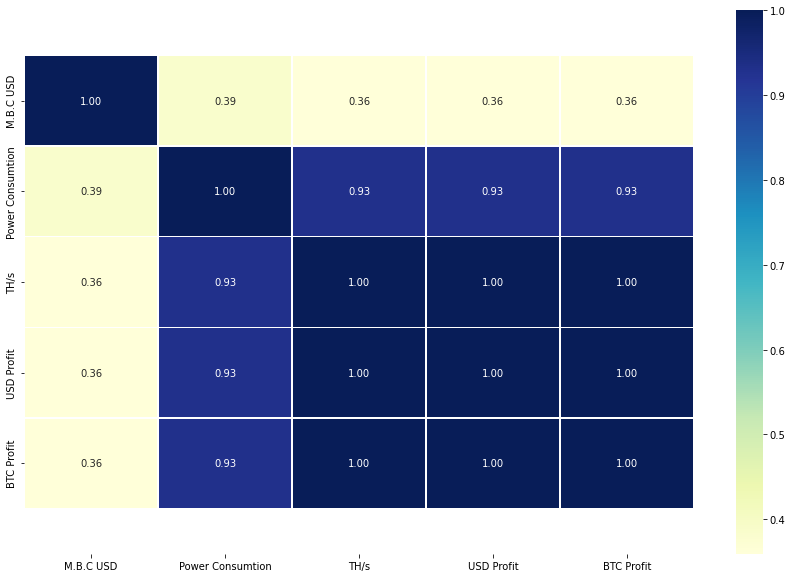

In [8]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [9]:
for column in df.columns:
  print(df[column].dtype)

object
object
float64
int64
int64
float64
float64


In [10]:
for column in df.columns:
  Lab=LabelEncoder()
  if(df[column].dtype=='object'):
    df[column]=Lab.fit_transform(df[column])

In [11]:
df

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit
0,0,0,102.2000,2800,70,139.569604,0.015218
1,0,1,98.5500,2700,60,119.631089,0.013044
2,0,2,118.6250,3250,95,189.415892,0.020653
3,0,3,118.6250,3250,110,219.323664,0.023914
4,0,4,46.7200,1280,16,31.901624,0.003478
...,...,...,...,...,...,...,...
1174,130,4,28.0320,1280,16,31.901624,0.003478
1175,130,5,25.1412,1148,14,27.913921,0.003044
1176,130,6,63.5100,2900,58,115.643386,0.012609
1177,130,7,68.9850,3150,84,167.483525,0.018262


In [12]:
df.isnull().sum()

Country             0
Model               0
M.B.C USD           0
Power Consumtion    0
TH/s                0
USD Profit          0
BTC Profit          0
dtype: int64

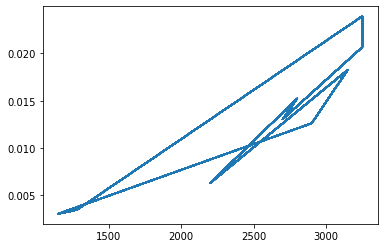

In [13]:
plt.plot(df['Power Consumtion'],df['BTC Profit'])

In [14]:
Reg=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=125)
Tree=DecisionTreeRegressor()
Forest=RandomForestRegressor(n_estimators=10)
Support=SVR(gamma='auto')

In [15]:
Algo=[Reg,KNN,Tree,Forest,Support]
Algorithms=["Reg","KNN","Tree","Forest","Support"]

In [16]:
x=df.drop(['BTC Profit'],axis=1)
y=df['BTC Profit']

In [17]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [21]:
Scores=[]
msr=[]
mar=[]
for A in Algo:
  A.fit(xtrain,ytrain)
  pred=A.predict(xtest)
  Scores.append(r2_score(ytest,pred))
  msr.append(mean_squared_error(ytest,pred))
  mar.append(mean_absolute_error(ytest,pred))

In [22]:
Scores=pd.DataFrame(Scores,columns=['r2_score'])
msr=pd.DataFrame(msr,columns=['Mean Squared Error'])

In [23]:
Algorithms=pd.DataFrame(Algorithms,columns=['Algorithms'])

In [24]:
mar=pd.DataFrame(mar,columns=['Mean Absolute Error'])
Algorithms=pd.DataFrame(Algorithms,columns=['Algorithms'])
Table=pd.concat([Algorithms,Scores],axis=1)
Table=pd.concat([Table,msr],axis=1)
Table=pd.concat([Table,mar],axis=1)
Table

,Algorithms,r2_score,Mean Squared Error,Mean Absolute Error
0,Reg,1.000000,4.102276e-35,4.739250e-18
1,KNN,0.968258,1.528091e-06,9.717706e-04
2,Tree,1.000000,2.825928e-34,1.251610e-17
3,Forest,1.000000,6.123967e-35,6.279184e-18
4,Support,-0.010048,4.862437e-05,5.745440e-03


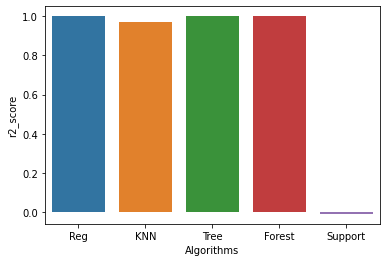

In [25]:
sns.barplot(x='Algorithms',y='r2_score',data=Table)

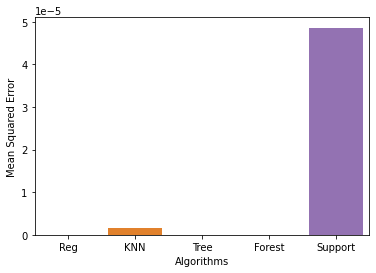

In [26]:
sns.barplot(x='Algorithms',y='Mean Squared Error',data=Table)

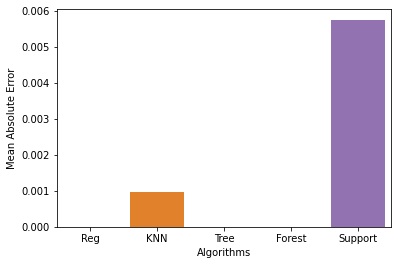

In [27]:
sns.barplot(x='Algorithms',y='Mean Absolute Error',data=Table)

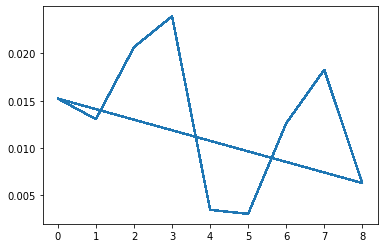

In [28]:
plt.plot(df['Model'],df['BTC Profit'])

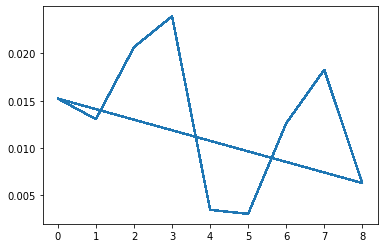

In [30]:
plt.plot(df['Model'],Reg.predict(Scaled_x))

In [31]:
x

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit
0,0,0,102.2000,2800,70,139.569604
1,0,1,98.5500,2700,60,119.631089
2,0,2,118.6250,3250,95,189.415892
3,0,3,118.6250,3250,110,219.323664
4,0,4,46.7200,1280,16,31.901624
...,...,...,...,...,...,...
1174,130,4,28.0320,1280,16,31.901624
1175,130,5,25.1412,1148,14,27.913921
1176,130,6,63.5100,2900,58,115.643386
1177,130,7,68.9850,3150,84,167.483525


In [35]:
Reg.predict([[0,0,102.2000,2800,70,139.569604]])

array([0.74979033])

In [36]:
y[0]

0.015218

In [37]:
Reg.fit(xtrain,ytrain)

LinearRegression()

In [38]:
Reg.score(xtest,ytest)

1.0

In [39]:
Reg.predict(xtest[:1])

array([0.023914])

In [40]:
ytest[:1]

660    0.023914
Name: BTC Profit, dtype: float64

In [42]:
ytest=list(ytest)

In [43]:
Labels=pd.DataFrame(ytest,columns=['Orginal Output'])
Pred=pd.DataFrame(Reg.predict(xtest),columns=["Predicted Output"])
Comparison=pd.concat([Labels,Pred],axis=1)
Comparison

,Orginal Output,Predicted Output
0,0.023914,0.023914
1,0.006305,0.006305
2,0.015218,0.015218
3,0.012609,0.012609
4,0.013044,0.013044
...,...,...
231,0.015218,0.015218
232,0.020653,0.020653
233,0.020653,0.020653
234,0.020653,0.020653
